In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyclustertend import hopkins
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.rename(columns={"Annual Income (k$)": "annual_income",
                   "Spending Score (1-100)": "spending_score"}, inplace=True)

In [7]:
df.head()

,CustomerID,Gender,Age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.drop(columns="CustomerID", inplace=True)

In [9]:
df.head()

,Gender,Age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df.nunique()

Gender             2
Age               51
annual_income     64
spending_score    84
dtype: int64

In [11]:
df["Gender"] = df.Gender.map({"Male": 0, "Female": 1})

In [12]:
df.head()

,Gender,Age,annual_income,spending_score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [13]:
df.Gender.unique()

array([0, 1])

<AxesSubplot:>

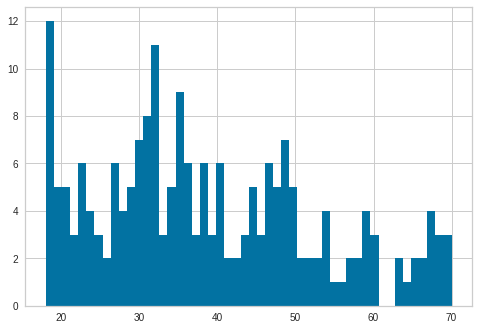

In [14]:
df.Age.hist(bins=50)

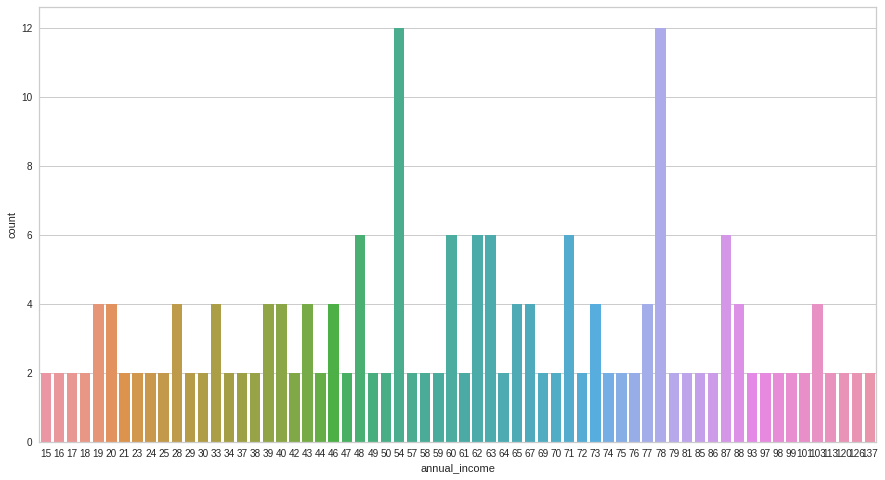

In [15]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.annual_income)
plt.show()

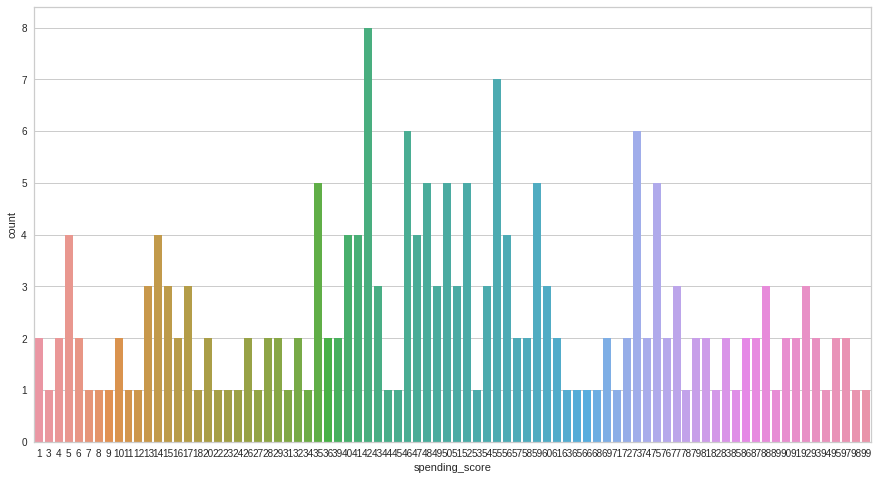

In [16]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.spending_score)
plt.show()

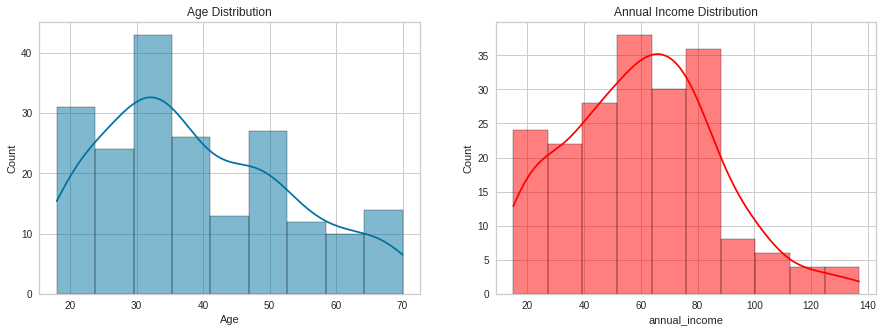

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(x=df.Age, kde=True)
plt.title("Age Distribution")

plt.subplot(1, 2, 2)
sns.histplot(x=df.annual_income, color="red", kde=True)
plt.title("Annual Income Distribution")
plt.show()

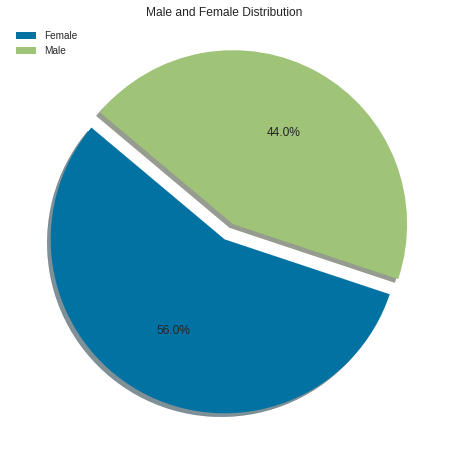

In [18]:
plt.figure(figsize=(8, 8))

explode = [0, 0.1]
plt.pie(df.Gender.value_counts(), explode=explode, autopct="%1.1f%%",
        shadow=True, startangle=140)
plt.legend(labels=["Female", "Male"])
plt.title("Male and Female Distribution")
# plt.axis("off")
plt.show()

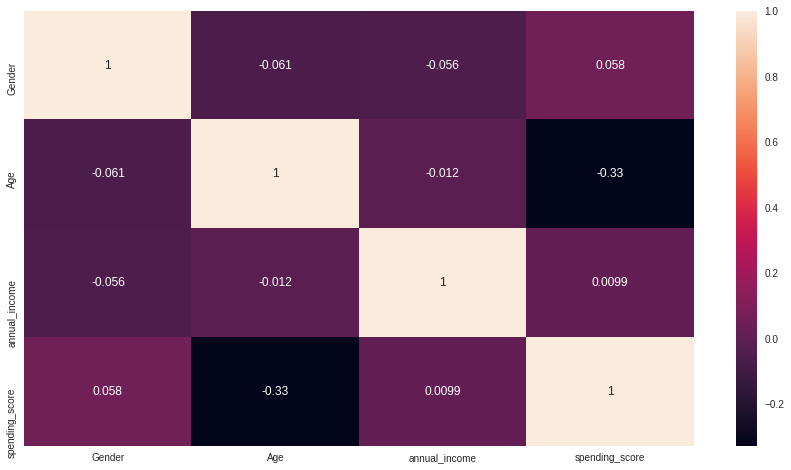

In [19]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

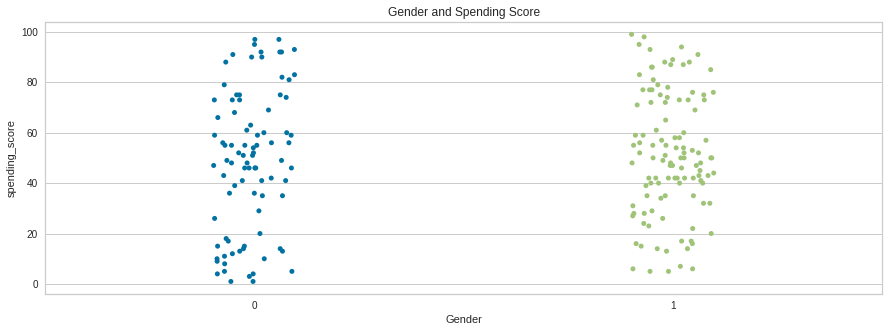

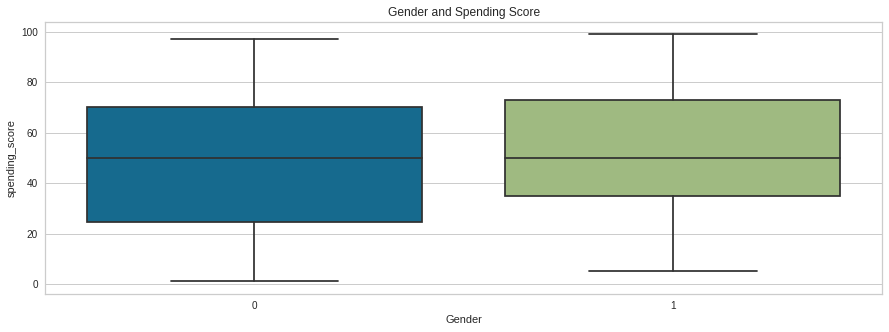

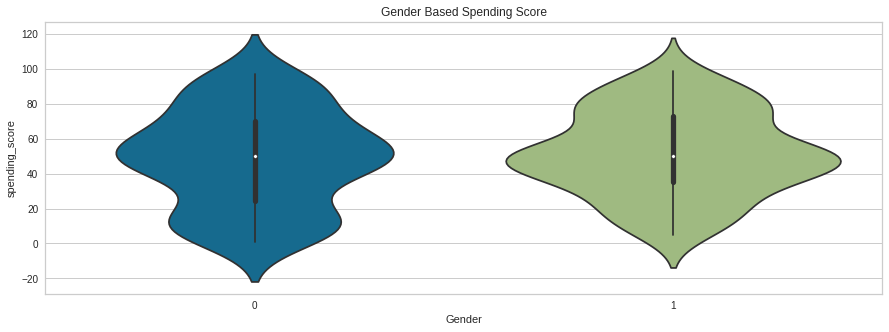

In [20]:
plt.figure(figsize=(15, 5))
sns.stripplot(x=df.Gender, y=df.spending_score)
plt.title("Gender and Spending Score")
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x=df.Gender, y=df.spending_score)
plt.title("Gender and Spending Score")
plt.show()

plt.figure(figsize=(15, 5))
sns.violinplot(x=df.Gender, y=df.spending_score)
plt.title("Gender Based Spending Score")
plt.show()

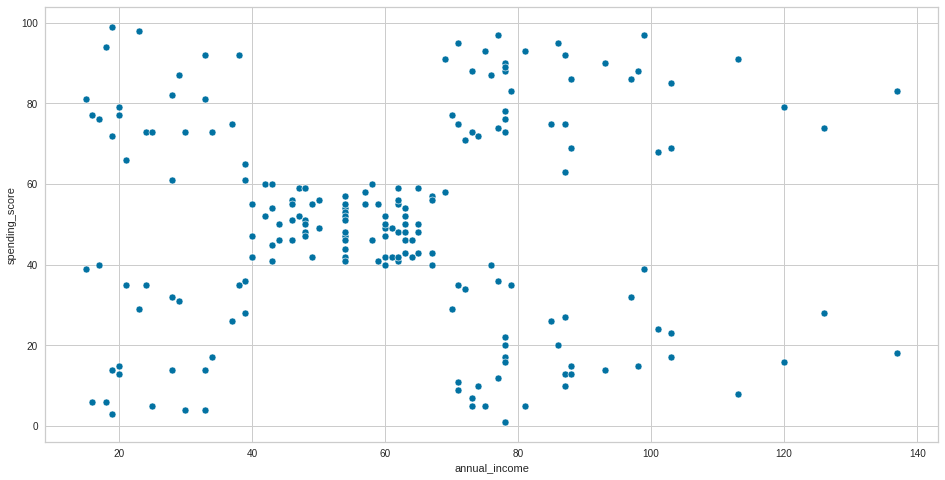

In [21]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(x=df.annual_income, y=df.spending_score, ax=ax)
plt.show()

In [22]:
# Clustering based on Age and Spending Score

In [23]:
hopkins(df, df.shape[0])

0.31574332922186576

In [24]:
x1 = pd.DataFrame(df.loc[:, ["Age", "spending_score"]])

In [25]:
x1

,Age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [26]:
hopkins(x1, x1.shape[0])

0.35302373845558155

In [27]:
# Let's find the optimal k value for k-means.

In [28]:
wcss = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

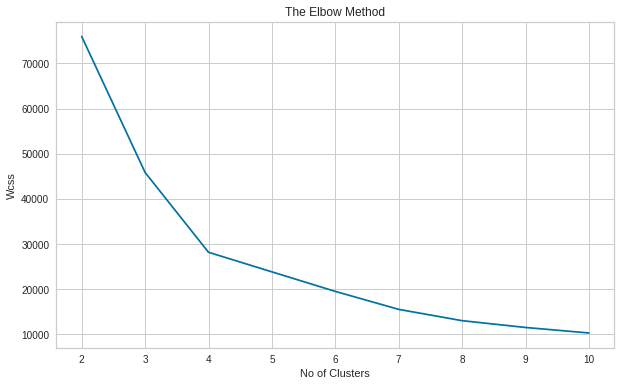

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("Wcss")
plt.show()

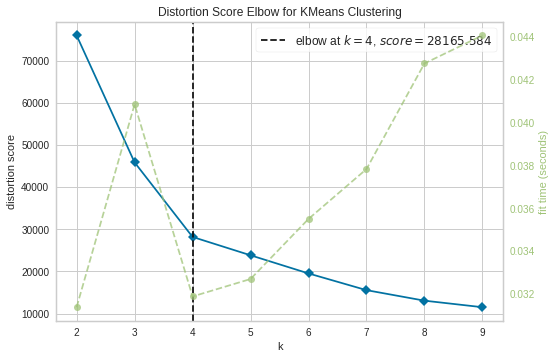

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(x1)
visualizer.poof()

In [31]:
# 4 seems to be the optimal value of k hyperparameter.

In [32]:
kmeans = KMeans(n_clusters=4)

In [33]:
y_means = kmeans.fit_predict(x1)

In [34]:
x1["cluster_id"] = y_means

In [35]:
x1

,Age,spending_score,cluster_id
0,19,39,2
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,2
...,...,...,...
195,35,79,1
196,45,28,0
197,32,74,1
198,32,18,0


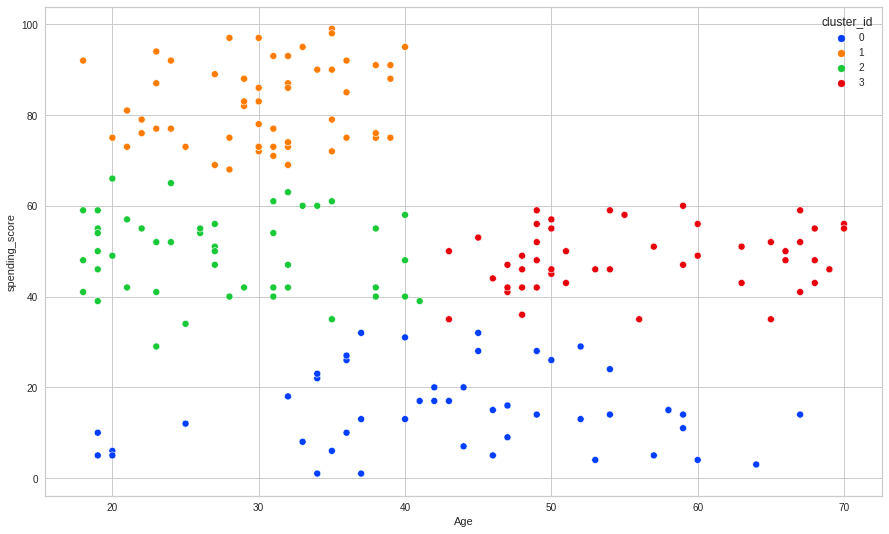

In [36]:
plt.figure(figsize=(15, 9))
sns.scatterplot(x=x1.Age, y=x1.spending_score, hue=x1.cluster_id,
                palette="bright")
plt.show()

In [37]:
# Clustering based on Annual Income and Spending Score

In [38]:
x2 = pd.DataFrame(df.loc[:, ["annual_income", "spending_score"]])

In [39]:
x2

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [40]:
hopkins(x2, x2.shape[0])

0.296314338189332

In [41]:
wcss = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

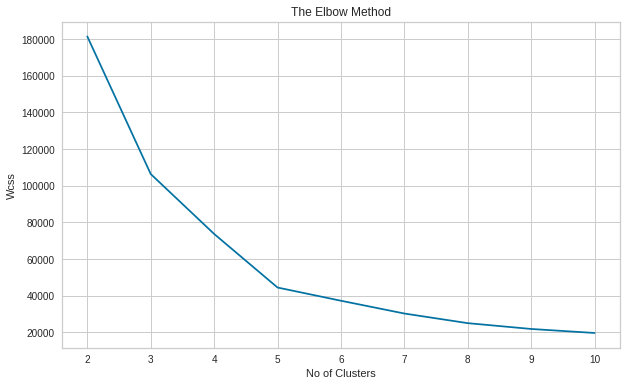

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("Wcss")
plt.show()

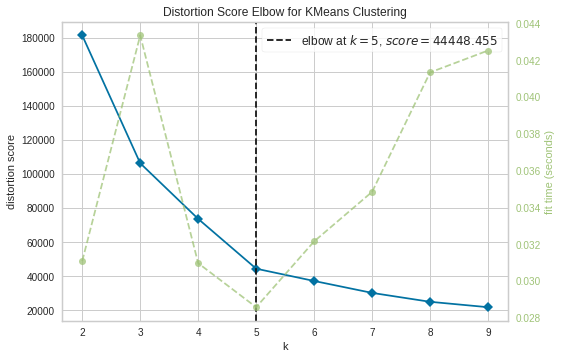

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(x2)
visualizer.poof()

In [44]:
kmeansmodel = KMeans(n_clusters=5)
kmeansmodel.fit(x2)

KMeans(n_clusters=5)

In [45]:
x2["cluster_id"] = kmeansmodel.labels_

In [46]:
x2

,annual_income,spending_score,cluster_id
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0
...,...,...,...
195,120,79,2
196,126,28,3
197,126,74,2
198,137,18,3


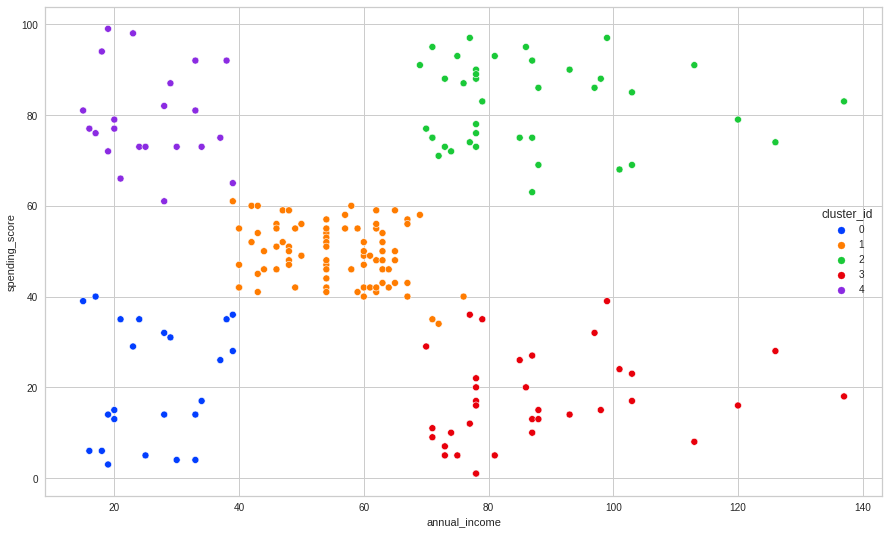

In [47]:
plt.figure(figsize=(15, 9))
sns.scatterplot(x=x2.annual_income, y=x2.spending_score, hue=x2.cluster_id,
                palette="bright")
plt.show()

In [48]:
hc_complete = linkage(x1, "complete")
hc_ward = linkage(x1, "ward")

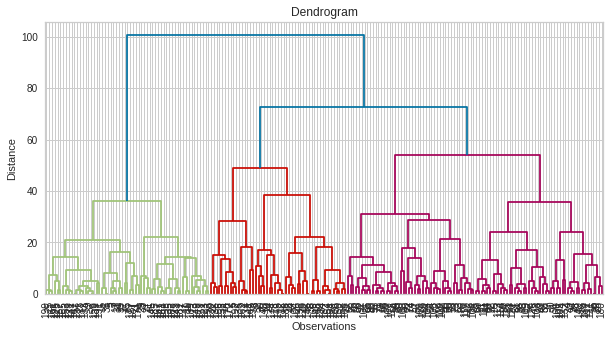

In [49]:
plt.figure(figsize=(10, 5))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10)
plt.show()

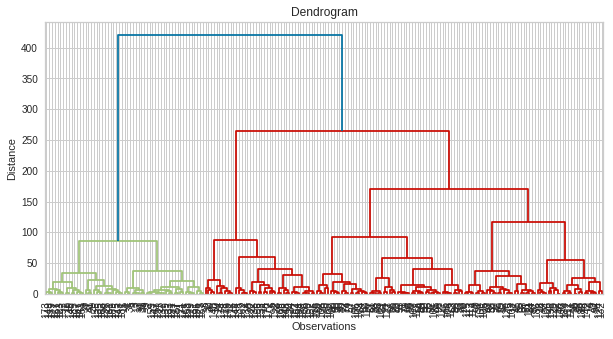

In [50]:
plt.figure(figsize=(10, 5))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10)
plt.show()

In [51]:
hc_complete = linkage(x2, "complete")
hc_ward = linkage(x2, "ward")

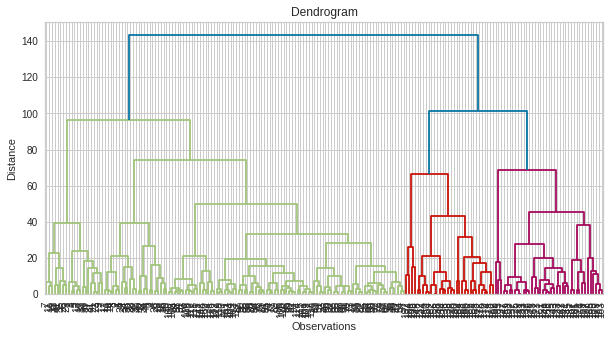

In [52]:
plt.figure(figsize=(10, 5))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10)
plt.show()

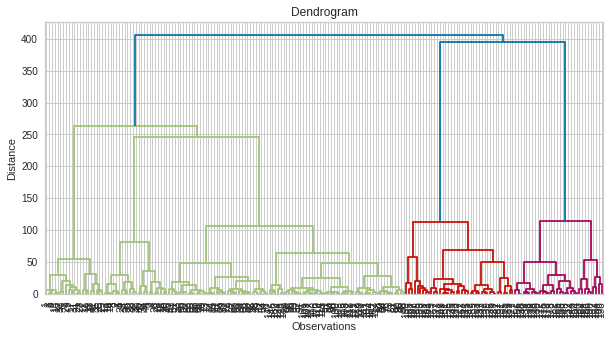

In [53]:
plt.figure(figsize=(10, 5))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10)
plt.show()

In [54]:
# Agglomerative Clustering for the x1 dataset with the cluster value of 4.

In [55]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean",
                                  linkage="ward")

In [56]:
y_agg = cluster.fit_predict(x1)

In [57]:
x1["cluster_id_agg"] = y_agg

In [58]:
x1.head()

,Age,spending_score,cluster_id,cluster_id_agg
0,19,39,2,0
1,21,81,1,3
2,20,6,0,2
3,23,77,1,3
4,31,40,2,0


In [59]:
cluster2 = AgglomerativeClustering(n_clusters=5, affinity="euclidean",
                                   linkage="ward")

In [60]:
y_agg2 = cluster.fit_predict(x2)

In [61]:
x2["cluster_id_agg"] = y_agg2

In [62]:
x2.head()

,annual_income,spending_score,cluster_id,cluster_id_agg
0,15,39,0,0
1,15,81,4,3
2,16,6,0,0
3,16,77,4,3
4,17,40,0,0


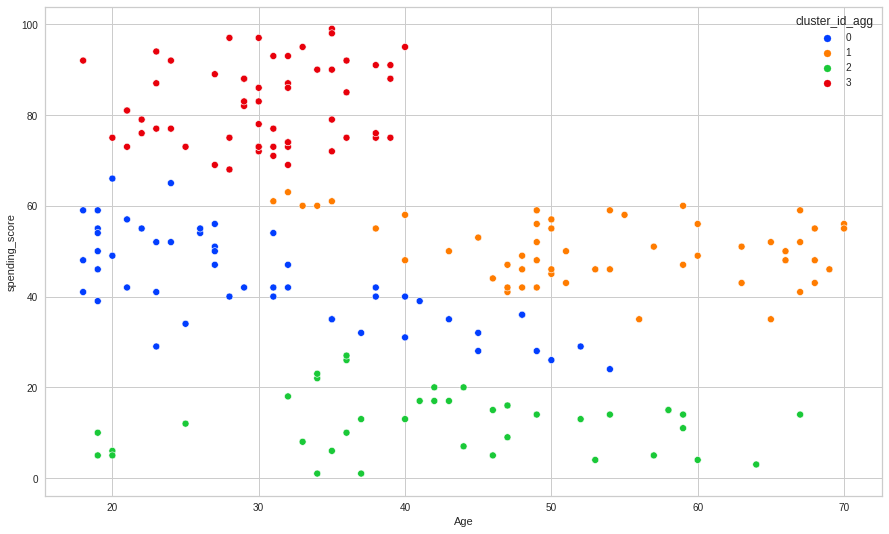

In [63]:
plt.figure(figsize=(15, 9))
g = sns.scatterplot(x=x1.Age, y=x1.spending_score, hue=x1.cluster_id_agg,
                    palette="bright")

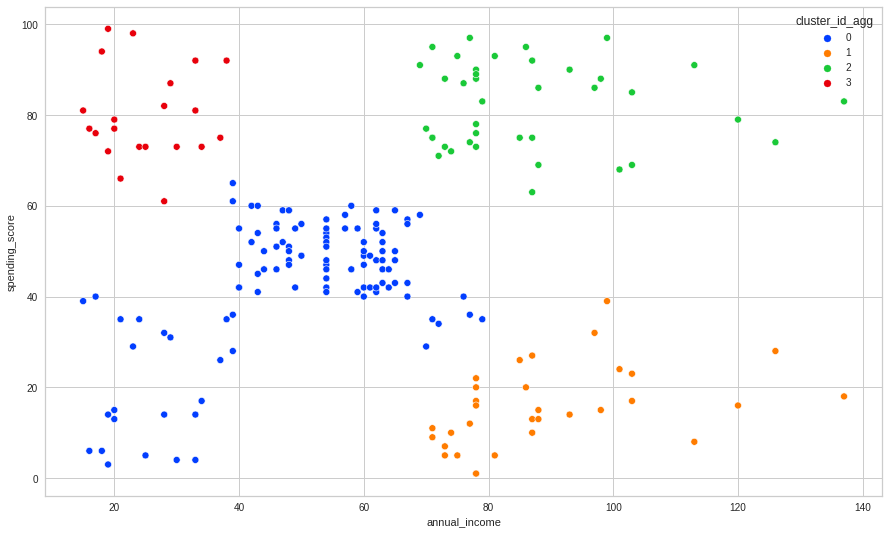

In [64]:
plt.figure(figsize=(15, 9))
g = sns.scatterplot(x=x2.annual_income, y=x2.spending_score,
                    hue=x2.cluster_id_agg, palette="bright")

In [65]:
df["cluster"] = y_agg2

In [66]:
df.head()

,Gender,Age,annual_income,spending_score,cluster
0,0,19,15,39,0
1,0,21,15,81,3
2,1,20,16,6,0
3,1,23,16,77,3
4,1,31,17,40,0


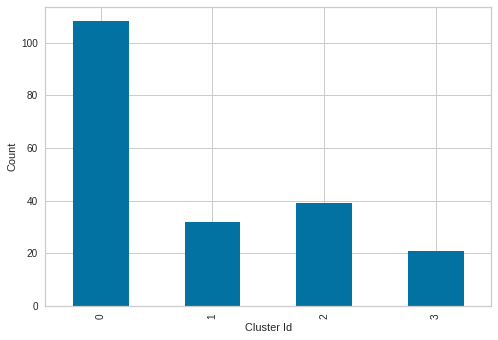

In [67]:
df.cluster.value_counts().plot(kind="bar")
plt.xlabel("Cluster Id")
plt.ylabel("Count")
plt.show()

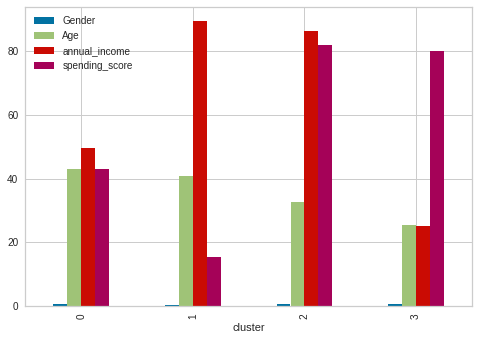

In [68]:
df.groupby(df.cluster).mean().plot(kind="bar")
plt.show()

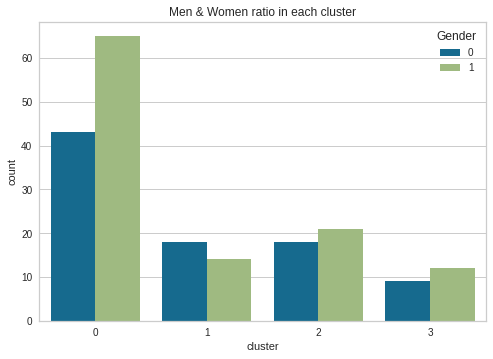

In [69]:
plt.title("Men & Women ratio in each cluster")
plt.ylabel("count")
sns.countplot(x=df.cluster, hue=df.Gender)
plt.show()